In [1]:
# make all necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

In [2]:
# Get train and test data from csv files into Dataframe
f1 = open('../data/datasets/titanic_test.csv')
f2 = open('../data/datasets/titanic_train.csv')

df1 = pd.read_csv(f1)
df2 = pd.read_csv(f2)


In [3]:
# Check the dimensions of data
print df1.shape
print df2.shape

(418, 11)
(891, 12)


In [4]:
# Preview the Dataset
df1[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df2[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Check Datatypes, check is some records are partially missing
print df1.info()
print df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null f

In [7]:
# Drop Nominal Features which are not likely to help any analysis
df1.drop(['Name','Ticket','Cabin','PassengerId'], axis=1, inplace=True)
df2.drop(['Name','Ticket','Cabin','PassengerId'], axis=1, inplace=True)

In [8]:
# Check descriptive properties of Dataset
df1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


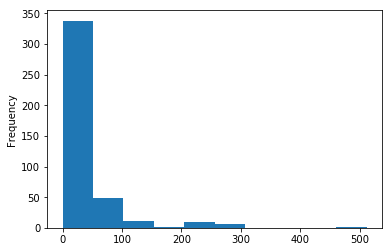

In [10]:
# Plot histogram of Fare
df1['Fare'].plot('hist')

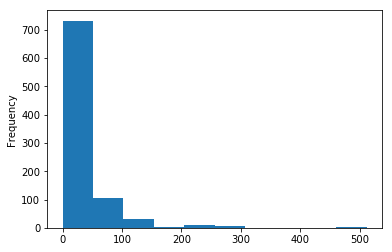

In [11]:
df2['Fare'].plot('hist')

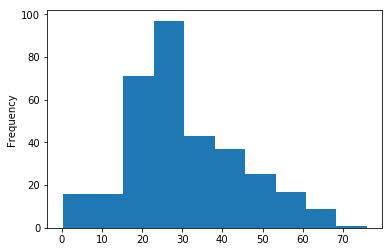

In [12]:
# Plot histogram of Age
df1['Age'].plot('hist')

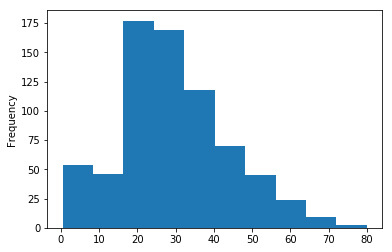

In [13]:
df2['Age'].plot('hist')

(-1.1175459219257882,
 1.2616929638112984,
 -1.1174520305627245,
 1.1661105462509465)

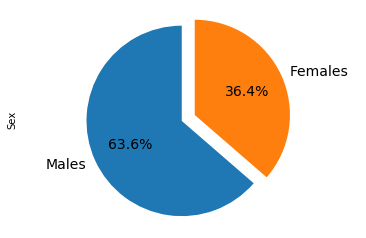

In [27]:
# Plot the pie chart of Sex
df1['Sex'].value_counts().plot.pie(
    labels=['Males', 'Females'],
    explode=(0,0.15),
    startangle=90,
    autopct='%1.1f%%',
#     colors=['b','r'],
    fontsize='14'
)
plt.axis('equal')

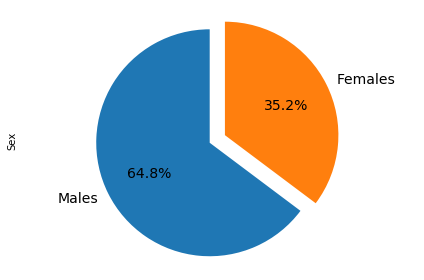

In [33]:
df2['Sex'].value_counts().plot.pie(
    labels=['Males', 'Females'],
    explode=(0,0.15),
    startangle=90,
    autopct='%1.1f%%',
#     colors=['b','r'],
    fontsize='14'
)
plt.axis('equal')
plt.tight_layout()

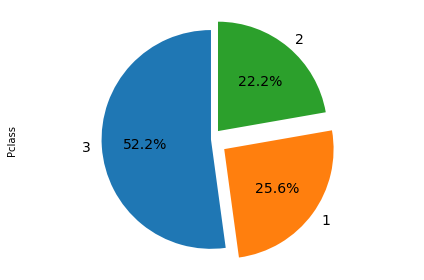

In [34]:
# Plot  the pie chart of Pclass
df1['Pclass'].value_counts().plot.pie(
# labels=['Males', 'Females'],
    explode=(0,0.15,0.10),
    startangle=90,
    autopct='%1.1f%%',
#     colors=['b','r'],
    fontsize='14'
)
plt.axis('equal')
plt.tight_layout()

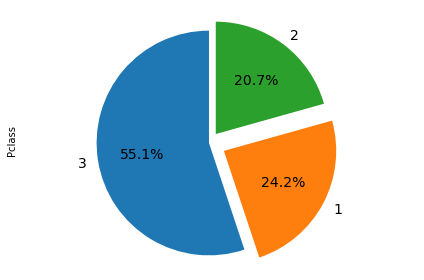

In [38]:
df2['Pclass'].value_counts().plot.pie(
    # labels=['Males', 'Females'],
    explode=(0,0.15,0.10),
    startangle=90,
    autopct='%1.1f%%',
#     colors=['b','r'],
    fontsize='14'
)
plt.axis('equal')
plt.tight_layout()

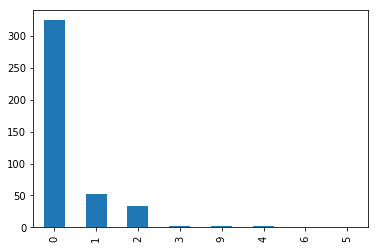

In [37]:
# Plot the bar graph of Parch
df1['Parch'].value_counts().plot.bar()


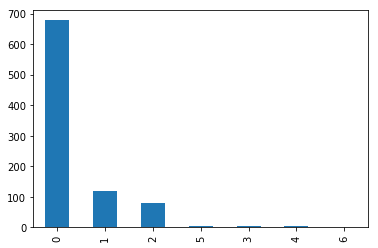

In [19]:
df2['Parch'].value_counts().plot.bar()

In [21]:
# Plot the pie chart of Survived
# df1['Survived'].value_counts().plot.pie()

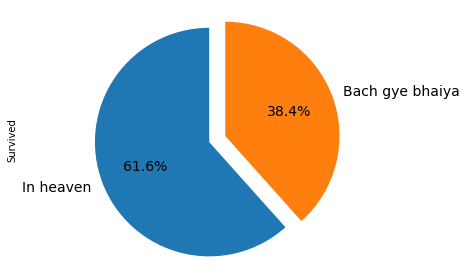

In [50]:
df2['Survived'].value_counts().plot.pie(
labels=['In heaven', 'Bach gye bhaiya'],
    explode=(0,0.15),
    startangle=90,
    autopct='%1.1f%%',
#     colors=['b','r'],
    fontsize='14'
)
plt.axis('equal')
plt.tight_layout()

In [52]:
# Encode Categorical variable
train = pd.get_dummies(df2,  columns=['Parch', 'Embarked', 'SibSp','Sex','Pclass'])
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
Survived      891 non-null int64
Age           714 non-null float64
Fare          891 non-null float64
Parch_0       891 non-null uint8
Parch_1       891 non-null uint8
Parch_2       891 non-null uint8
Parch_3       891 non-null uint8
Parch_4       891 non-null uint8
Parch_5       891 non-null uint8
Parch_6       891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
SibSp_0       891 non-null uint8
SibSp_1       891 non-null uint8
SibSp_2       891 non-null uint8
SibSp_3       891 non-null uint8
SibSp_4       891 non-null uint8
SibSp_5       891 non-null uint8
SibSp_8       891 non-null uint8
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
dtypes: float64(2), int64(1), uint8(22)
memory usage: 40.1 KB


,Survived,Age,Fare,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,...,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,38.0,71.2833,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,35.0,53.1000,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,35.0,8.0500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
# nominal variable

Mean of people who survived 48.3954076023
Mean of people who didn't survived 22.1178868852


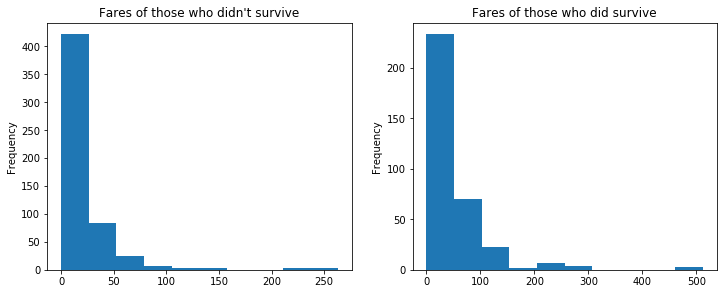

In [62]:
# get fare for survived & didn't survive passengers and plot it
fare_not_survived = train['Fare'][train["Survived"] == 0]
fare_survived = train['Fare'][train['Survived'] == 1]

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
fare_not_survived.plot(kind='hist', title='Fares of those who didn\'t survive')

plt.subplot(2,2,2)
fare_survived.plot(kind='hist', title='Fares of those who did survive')

print 'Mean of people who survived', np.nanmean(fare_survived)
print 'Mean of people who didn\'t survived', np.nanmean(fare_not_survived)

Mean of people who survived 28.3436896552
Mean of people who didn't survived 30.6261792453


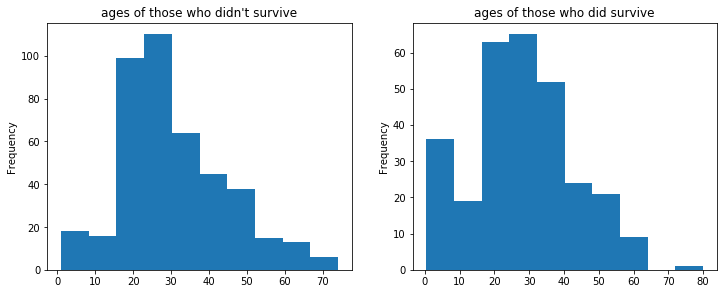

In [64]:
# get age for survived & didn't survive passengers and plot it
age_not_survived = train['Age'][train["Survived"] == 0]
age_survived = train['Age'][train['Survived'] == 1]

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
age_not_survived.plot(kind='hist', title='ages of those who didn\'t survive')

plt.subplot(2,2,2)
age_survived.plot(kind='hist', title='ages of those who did survive')

print 'Mean of people who survived', np.nanmean(age_survived)
print 'Mean of people who didn\'t survived', np.nanmean(age_not_survived)

Mean of sexes who survived 1.0


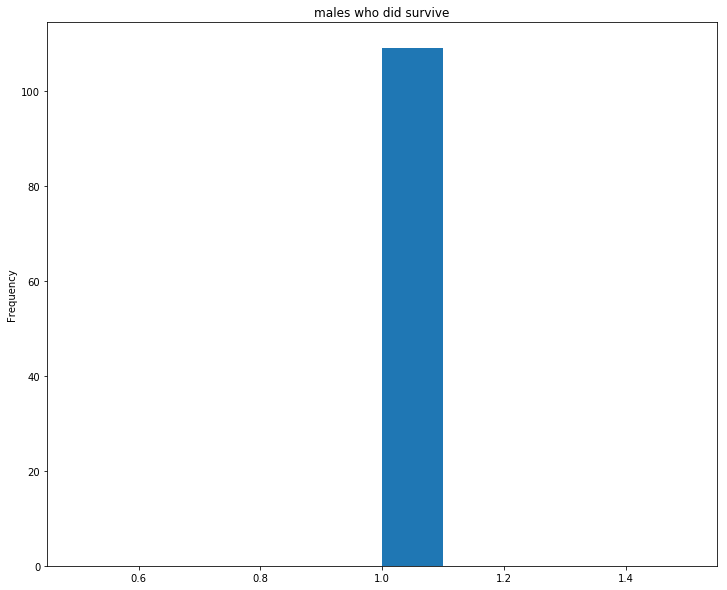

In [74]:
# Visualize Survival and Gender. How many males survived? How many Females survived?, How many of them died?
# male_survived = train['Sex_male'][train["Survived"] == 1]
sex_survived = train['Survived'][(train['Sex_male'] == 1) &(train['Survived'] == 1)]
# female_survived = train['Sex_female'][train['Survived'] == 1]

plt.figure(figsize=(12,10))
# plt.subplot(2,2,1)
sex_survived.plot(kind='hist', title='males who did survive')

# plt.subplot(2,2,2)
# female_survived.plot(kind='hist', title='females those who did survive')

print 'Mean of sexes who survived', np.nanmean(sex_survived)
# print 'Mean of male who didn\'t survived', np.nanmean(male_survived)

# male_not_survived = train['male'][train["Survived"] == 0]
# male_survived = train['male'][train['Survived'] == 1]

# plt.figure(figsize=(12,10))
# plt.subplot(2,2,1)
# male_not_survived.plot(kind='hist', title='males of those who didn\'t survive')

# plt.subplot(2,2,2)
# male_survived.plot(kind='hist', title='males of those who did survive')

# print 'Mean of people who survived', np.nanmean(male_survived)
# print 'Mean of people who didn\'t survived', np.nanmean(male_not_survived)

{'Male': 109, 'Female': 233}
{'Male': 81, 'Female': 468}

Survived 
          0
Male    109
Female  233

Not Survived
          0
Male     81
Female  468


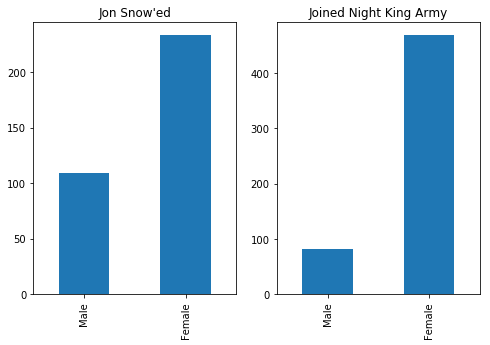

In [91]:
sex_survived = {
    'Male':len(train.Survived[train.Sex_male == 1][train.Survived == 1]),
    'Female':len(train.Survived[train.Sex_female == 1][train.Survived == 1])
}
print sex_survived

sex_not_survived = {
    'Male':len(train.Survived[train.Sex_male == 0][train.Survived == 0]),
    'Female':len(train.Survived[train.Sex_female == 0][train.Survived == 0])
}
print sex_not_survived

df_sex_survived = pd.DataFrame.from_dict(sex_survived, orient='index')
df_sex_not_survived = pd.DataFrame.from_dict(sex_not_survived, orient='index')

print '\nSurvived \n', df_sex_survived
print '\nNot Survived\n', df_sex_not_survived

plt.figure(figsize=(8,5))
plt.subplot(121)
# GoT spoiler alert
df_sex_survived[0].plot(kind='bar', title='Jon Snow\'ed')

plt.subplot(122)
df_sex_not_survived[0].plot(kind='bar', title='Joined Night King Army')
# plt.subplot(2,2,1)
# df_sex_survived.plot.bar()
# plt.subplot(2,2,2)
# df_sex_not_survived.plot.bar()